# Lung Cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
data = pd.read_csv("lung cancer.csv")
data.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
294,M,67,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
300,F,63,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
110,M,58,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
137,M,67,1,1,1,2,1,2,1,2,1,2,2,1,2,YES
263,F,71,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
85,M,60,1,2,2,1,1,1,1,2,2,2,2,2,1,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
193,F,64,1,1,1,2,2,1,1,1,1,1,1,1,1,YES
170,M,54,1,2,1,2,2,2,2,2,2,2,1,2,2,YES
196,M,64,1,2,2,1,2,1,2,1,2,2,2,1,2,YES


In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
data.duplicated().sum()

33

In [6]:
df = data.drop_duplicates()

In [7]:
df.shape

(276, 16)

In [8]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [10]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [11]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

No null values present

In [12]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

## EDA

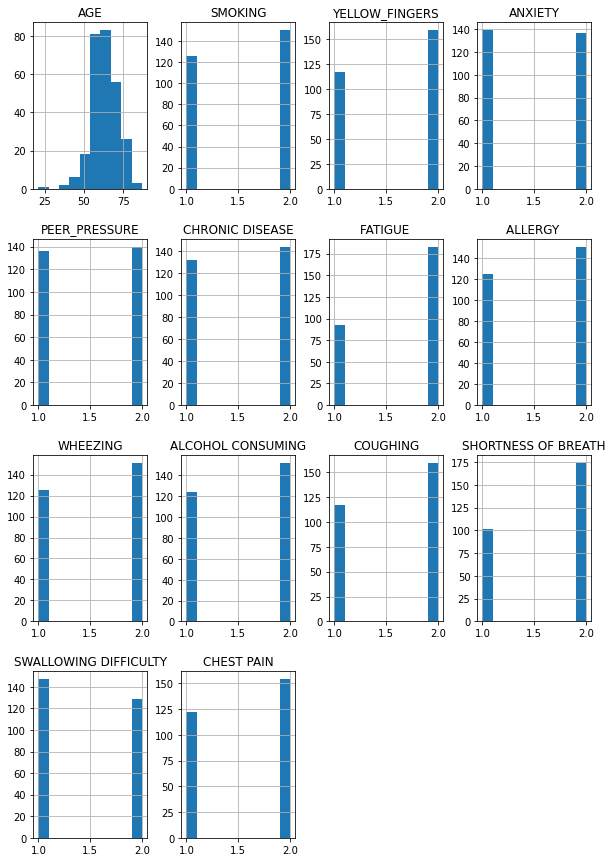

In [14]:
plot = df.hist(figsize=(10,15))

In [15]:
df1 = df.replace({"M":0, "F":1, "NO":0, "YES":1})
df1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


## Handling outliers

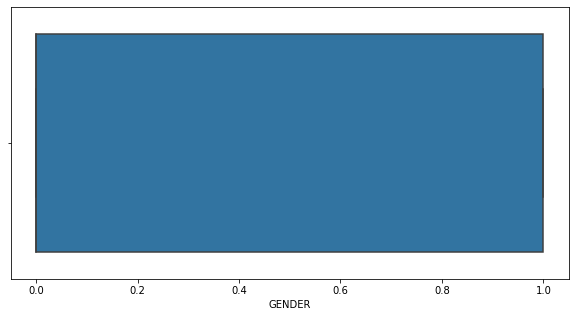

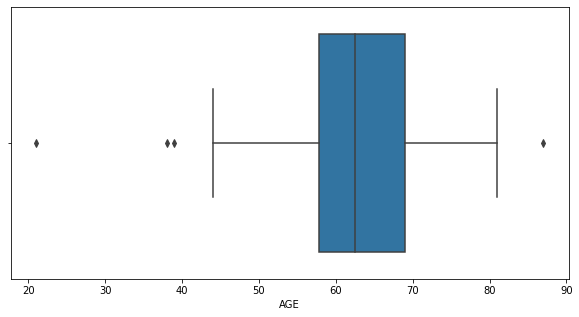

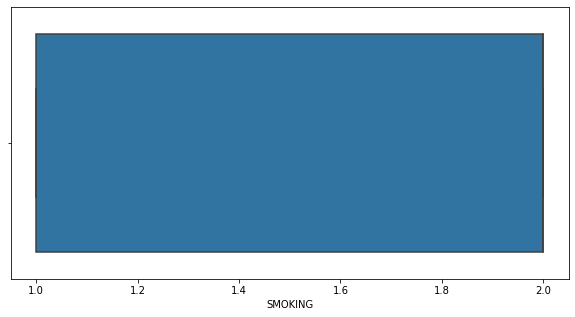

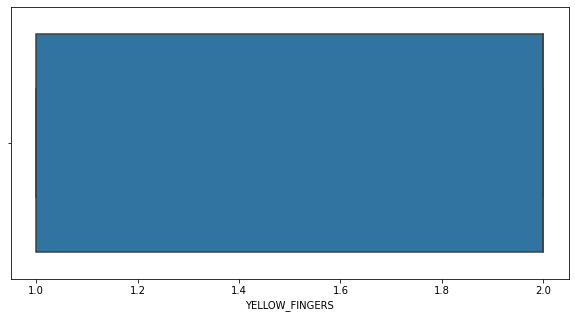

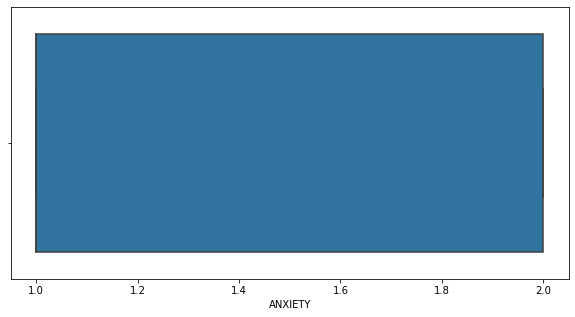

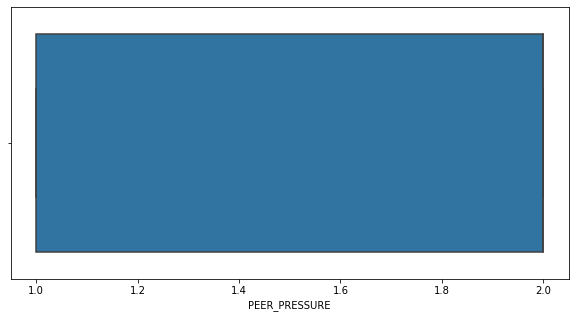

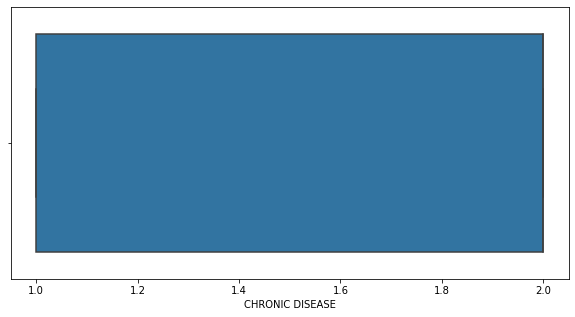

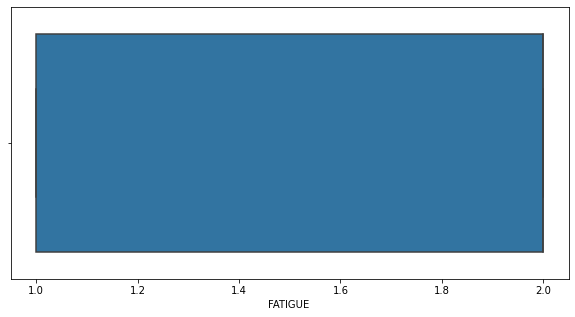

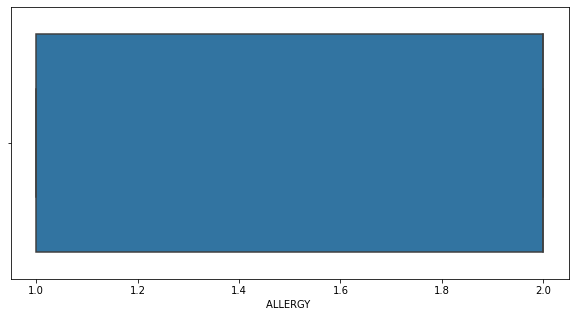

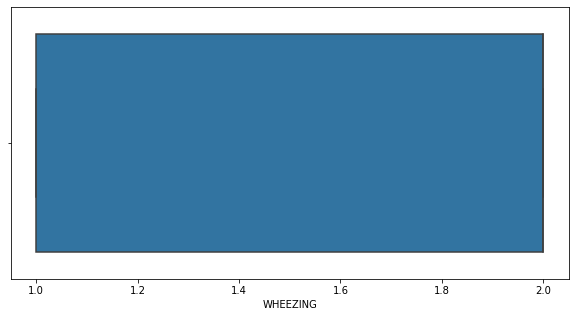

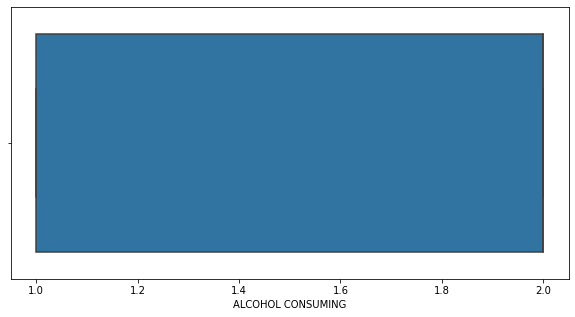

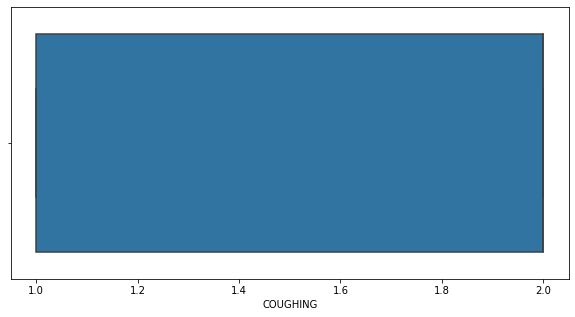

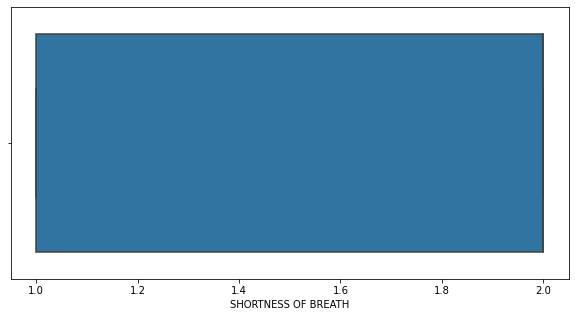

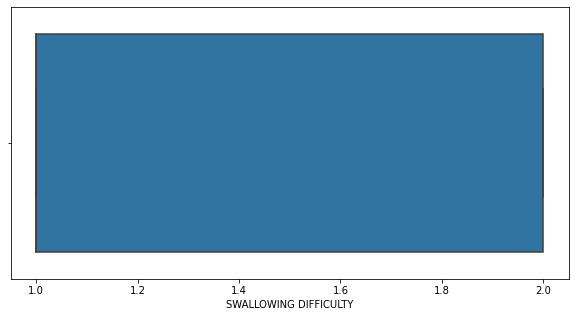

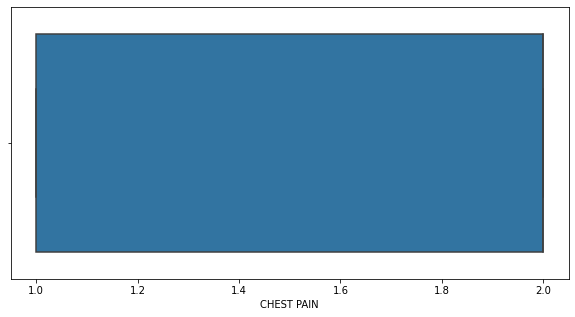

In [16]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df1)

In [17]:
df1_age = df1["AGE"]
q1=df1["AGE"].quantile(0.25)
q3=df1["AGE"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
df1["AGE"]=np.where(df1["AGE"]<=lower_limit,lower_limit,df1["AGE"])
df1["AGE"]=np.where(df1["AGE"]>=upper_limit,upper_limit,df1["AGE"])
df1["AGE"]

0      69.0
1      74.0
2      59.0
3      63.0
4      63.0
       ... 
279    59.0
280    59.0
281    55.0
282    46.0
283    60.0
Name: AGE, Length: 276, dtype: float64

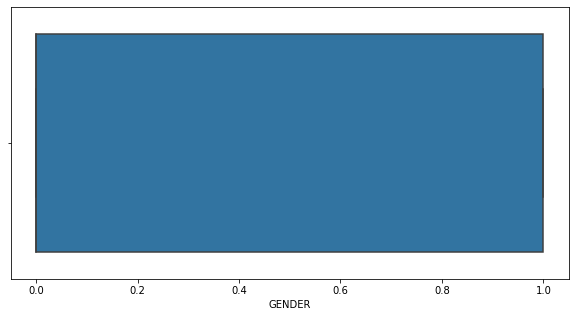

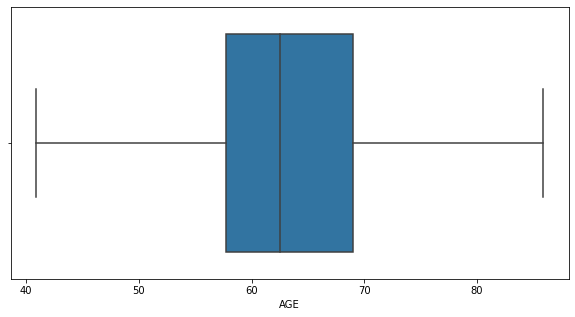

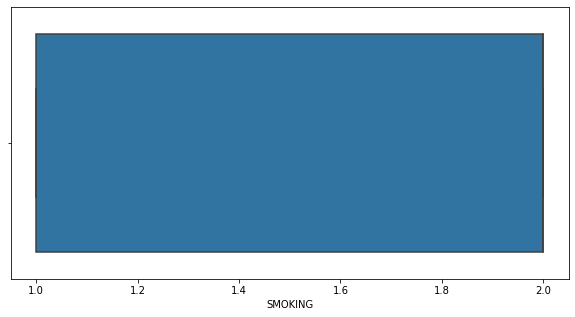

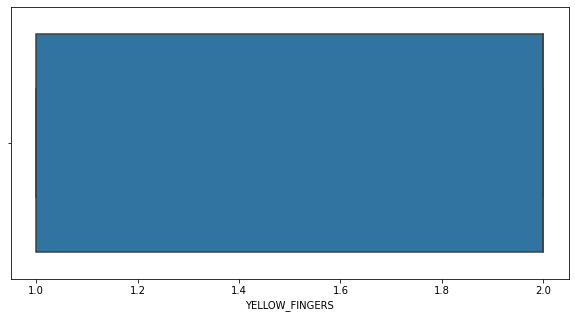

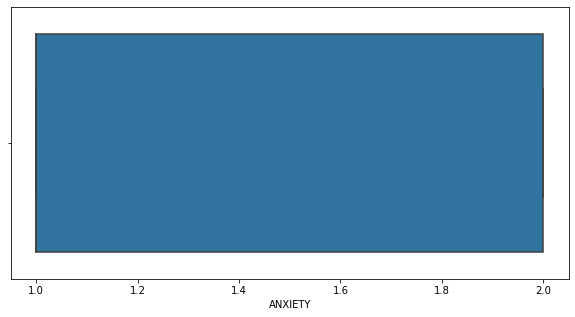

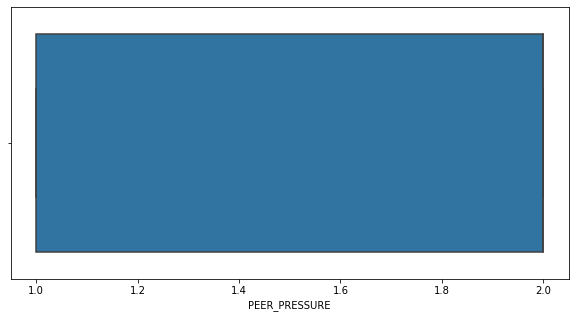

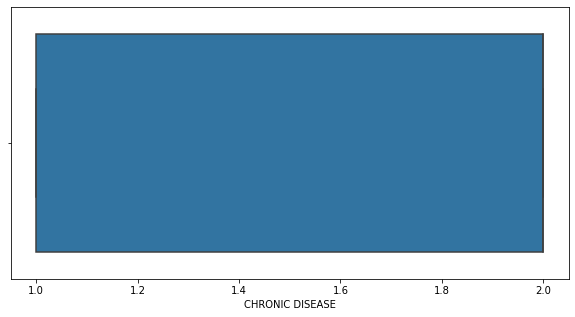

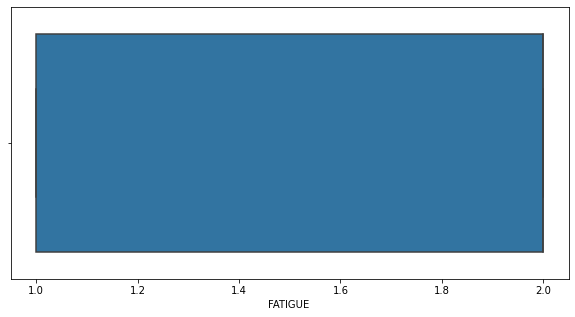

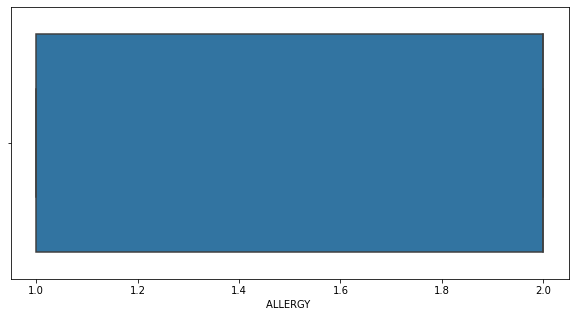

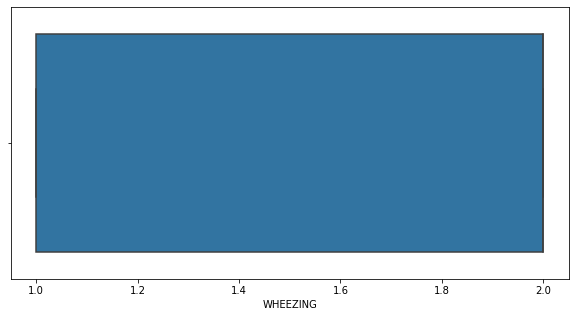

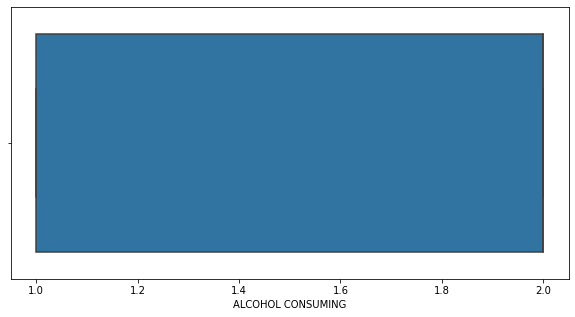

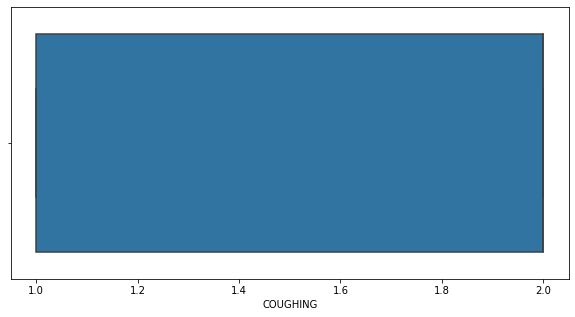

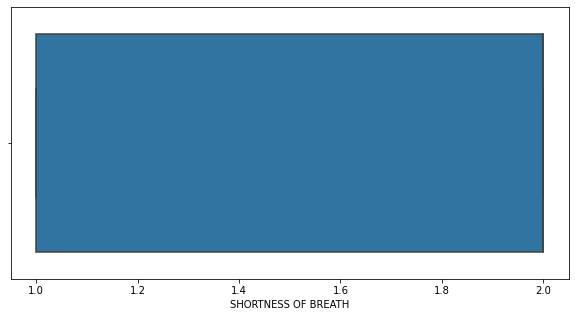

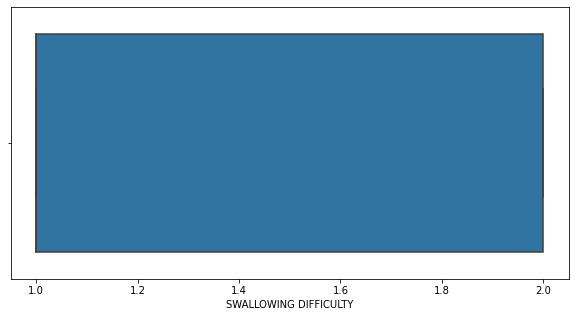

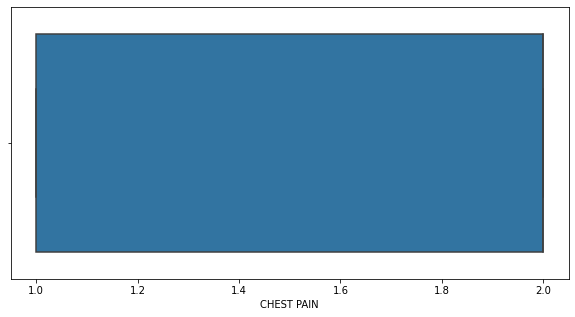

In [18]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df1)

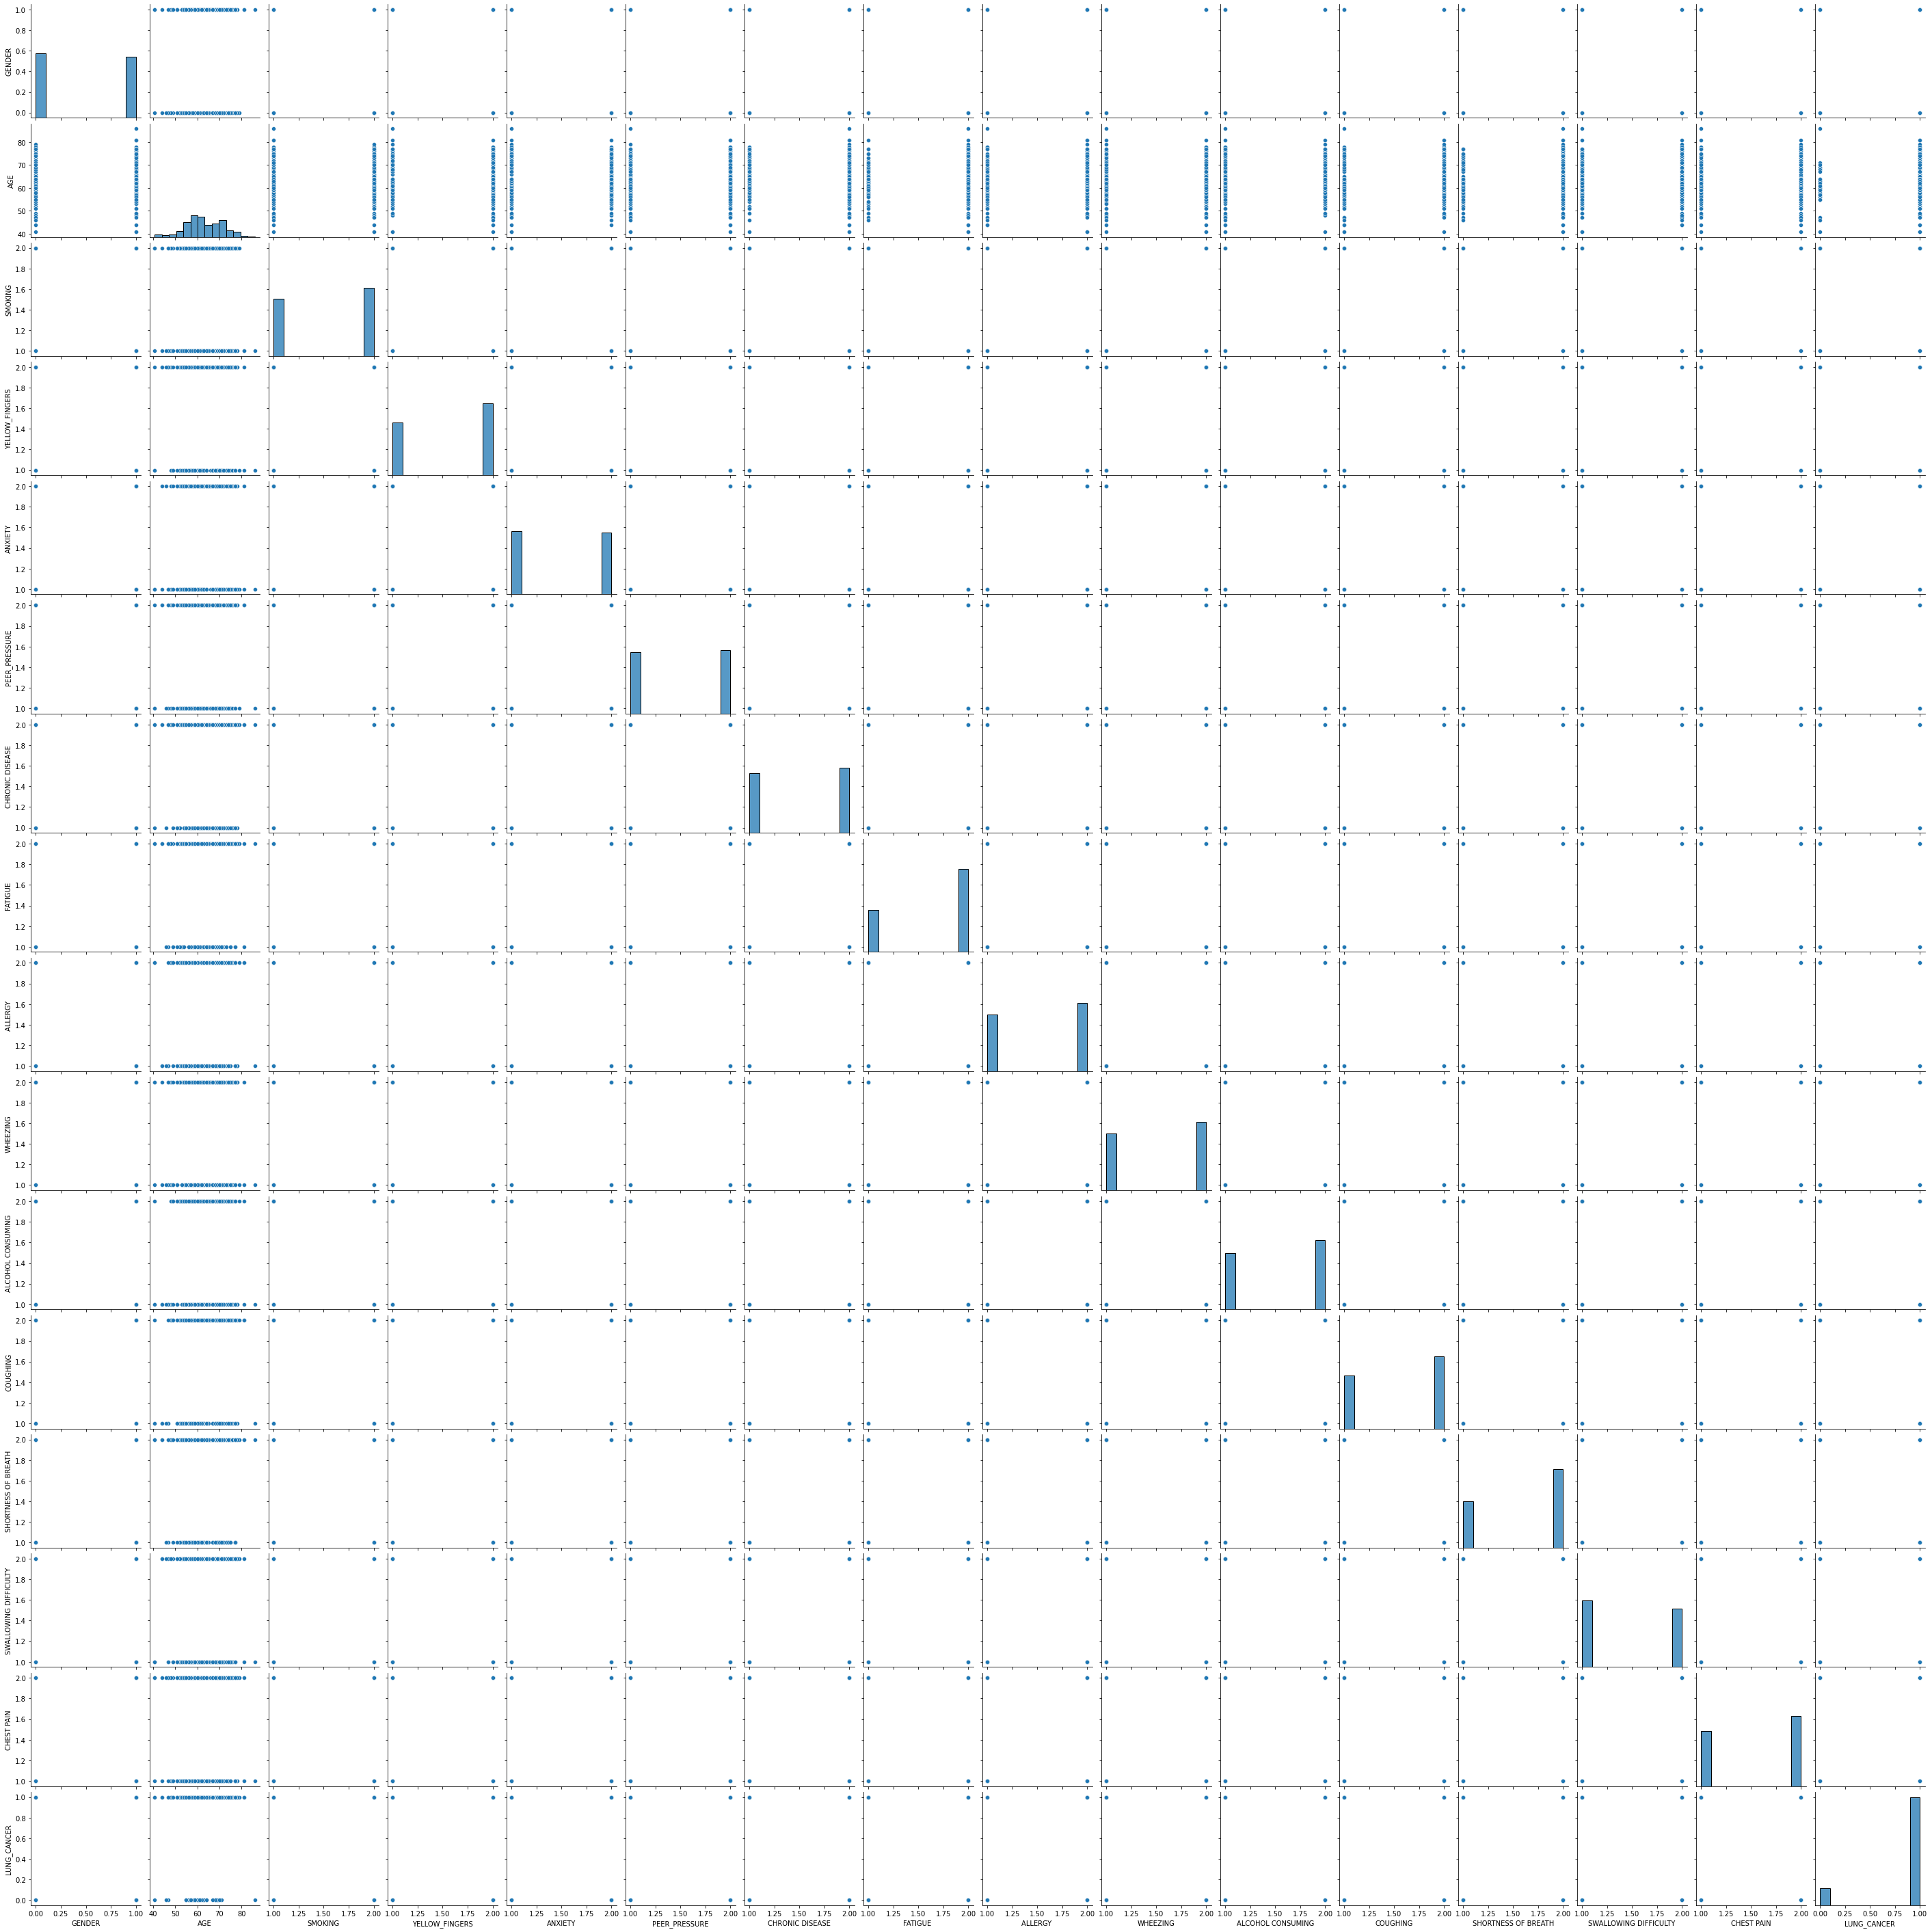

In [19]:
sns.pairplot(df1)

In [20]:
df1.value_counts("LUNG_CANCER")

LUNG_CANCER
1    238
0     38
dtype: int64

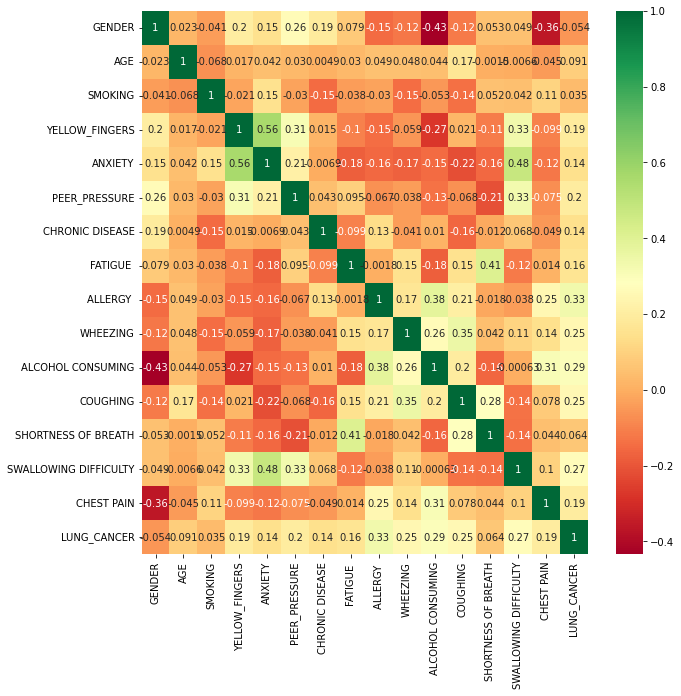

In [21]:
corr = df1.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sns.heatmap(df1[features].corr(), annot=True, cmap='RdYlGn')

## Train Test Split

In [22]:
y = df1["LUNG_CANCER"]
X = df1.drop(["LUNG_CANCER"],axis =1)

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [24]:
print("X train shape:" ,X_train.shape, "Y train shape:", y_train.shape )

X train shape: (220, 15) Y train shape: (220,)


In [25]:
print("X test shape:" ,X_test.shape, "Y test shape:", y_test.shape )

X test shape: (56, 15) Y test shape: (56,)


## Feature Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.0,0.691667,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.758333,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.758333,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.313889,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.647222,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,0.625000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
216,0.0,0.469444,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
217,1.0,0.691667,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,1.0,0.336111,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [27]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1.0,0.491667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.491667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.602778,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.247222,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
4,0.0,0.758333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
5,1.0,0.469444,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
6,0.0,0.425000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.691667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
8,1.0,0.780556,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
9,0.0,0.069444,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


## Handling Imbalanced Class

In [28]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros =  RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_resampled))
print(sorted(Counter(y_resampled).items()))

Original dataset shape Counter({1: 238, 0: 38})
Resample dataset shape Counter({1: 189, 0: 189})
[(0, 189), (1, 189)]


## Model Building and Evaluation

Training accuracy:  0.9021164021164021
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D46F5E3520>
Classification Report               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.98      0.92      0.95        49

    accuracy                           0.91        56
   macro avg       0.79      0.89      0.83        56
weighted avg       0.93      0.91      0.92        56



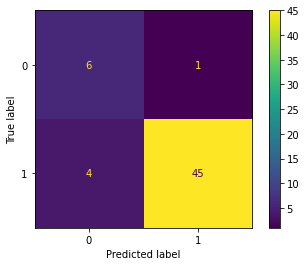

In [29]:
## model 1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_resampled, y_resampled)
print('Training accuracy: ', model.score(X_resampled, y_resampled))

y_pred = model.predict(X_test_scaled)
y_pred


print("Plot confusion matrix",plot_confusion_matrix(model, X_test_scaled, y_test))
print("Classification Report",classification_report(y_test, y_pred))

Training accuracy:  1.0
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D46C6B39A0>
Classification Report               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.98      0.96      0.97        49

    accuracy                           0.95        56
   macro avg       0.86      0.91      0.88        56
weighted avg       0.95      0.95      0.95        56



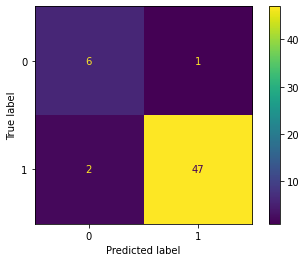

In [30]:
## model 2

from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_2.score(X_resampled, y_resampled))

y_prediction = model_2.predict(X_test_scaled)
y_prediction

print("Plot confusion matrix",plot_confusion_matrix(model_2, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test ,y_prediction))


Training accuracy:  1.0
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D46F74B190>
Classification Report               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.94      0.96      0.95        49

    accuracy                           0.91        56
   macro avg       0.80      0.77      0.78        56
weighted avg       0.91      0.91      0.91        56



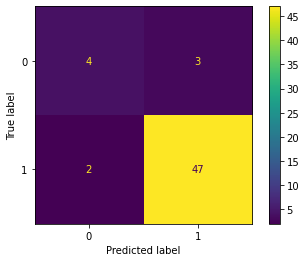

In [31]:
## model 3

from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_3.score(X_resampled, y_resampled))

y_predict = model_3.predict(X_test_scaled)
y_predict

print("Plot confusion matrix",plot_confusion_matrix(model_3, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test, y_predict))

Training accuracy:  0.9894179894179894
Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001D46F740C40>
Classification Report               precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.96      0.94      0.95        49

    accuracy                           0.91        56
   macro avg       0.79      0.83      0.81        56
weighted avg       0.92      0.91      0.91        56



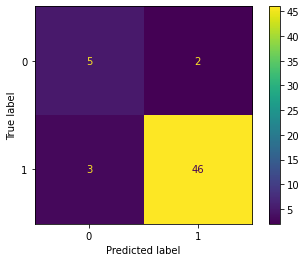

In [32]:
## model 4

from sklearn.ensemble import GradientBoostingClassifier
model_4 = GradientBoostingClassifier()
model_4.fit(X_resampled, y_resampled)
print('Training accuracy: ',model_4.score(X_resampled, y_resampled))

y_predic = model_4.predict(X_test_scaled)
y_predic

print("Plot confusion matrix",plot_confusion_matrix(model_4, X_test_scaled, y_test))

print("Classification Report",classification_report(y_test, y_predic))